<a href="https://colab.research.google.com/github/snikhil17/NLP_course_Simplilearn/blob/main/Self%20Learning%20Content%20Practice/2_Processing_Raw_text_with_NLTK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pipline:**
- Has 3 components
   - Souorce (Raw Text)
   - Pipeline Itself
   - Sink: Where stores/disply the result of the pipeline

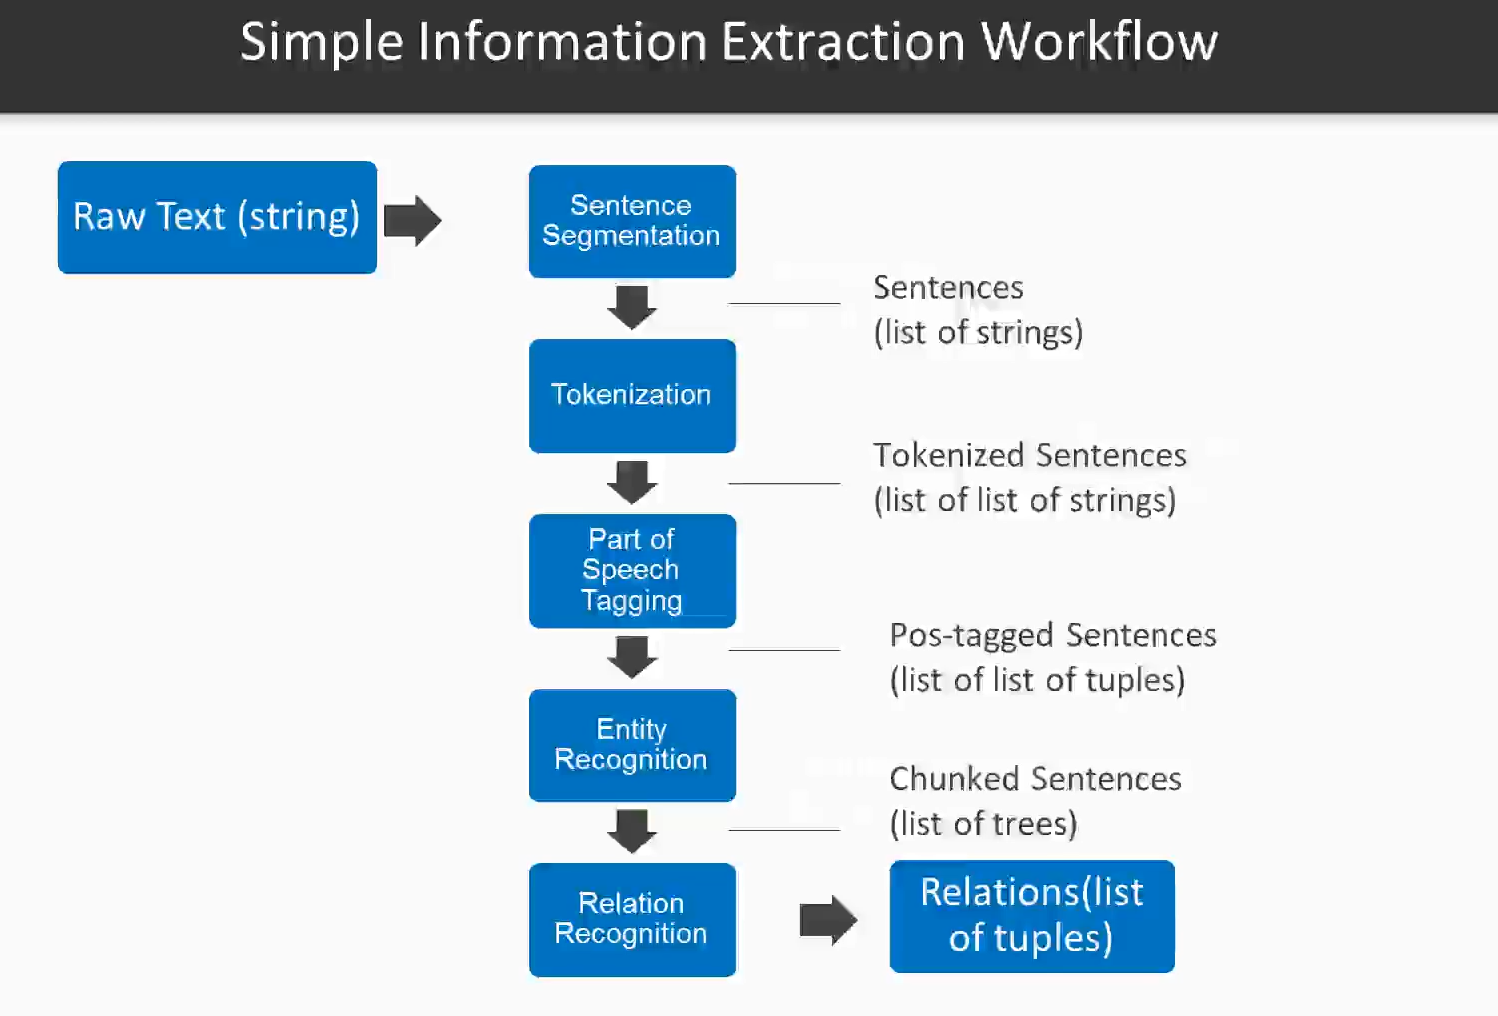

In [12]:
# Reference (1st para): https://en.wikipedia.org/wiki/Golden_Retriever
import nltk
texts = [ """
The Golden Retriever is a medium-large gun dog that was bred to retrieve shot waterfowl, such as ducks and upland game birds, during 
hunting and shooting parties.[3] The name "retriever" refers to the breed's ability to retrieve shot game undamaged due to their soft mouth. 
Golden retrievers have an instinctive love of water, and are easy to train to basic or advanced obedience standards. They are a long-coated breed, 
with a dense inner coat that provides them with adequate warmth in the outdoors, and an outer coat that lies flat against their bodies and repels water. 
Golden retrievers are well suited to residency in suburban or country environments.[4] They shed copiously, particularly at the change of seasons, 
and require fairly regular grooming. The Golden Retriever was originally bred in Scotland in the mid-19th century.[3][5]
"""]

Creating Pipeline, Steps:
- **Source: text** 
- **Pipeline:**
  - Tokenization
    - Sentence Tokenization 
    - Word Tokenization
  - POS tagging
  - nltk.ne_chunk() : nltk.ne_chunk returns a nested nltk.tree.Tree object (NER)
- **Sink:** 
  - print tagged words


In [16]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [17]:
for text in texts:
  sentences = nltk.sent_tokenize(text)
  for sentence in sentences:
    words = nltk.word_tokenize(sentence)
    tagged_words = nltk.pos_tag(words)
    ne_tagged_words = nltk.ne_chunk(tagged_words)
    print(ne_tagged_words)

(S
  The/DT
  (ORGANIZATION Golden/NNP)
  Retriever/NNP
  is/VBZ
  a/DT
  medium-large/JJ
  gun/NN
  dog/NN
  that/WDT
  was/VBD
  bred/VBN
  to/TO
  retrieve/VB
  shot/NN
  waterfowl/NN
  ,/,
  such/JJ
  as/IN
  ducks/NNS
  and/CC
  upland/JJ
  game/NN
  birds/NNS
  ,/,
  during/IN
  hunting/VBG
  and/CC
  shooting/VBG
  parties/NNS
  ./.)
(S
  [/RB
  3/CD
  ]/IN
  The/DT
  name/NN
  ``/``
  retriever/NN
  ''/''
  refers/NNS
  to/TO
  the/DT
  breed/NN
  's/POS
  ability/NN
  to/TO
  retrieve/VB
  shot/JJ
  game/NN
  undamaged/VBD
  due/JJ
  to/TO
  their/PRP$
  soft/JJ
  mouth/NN
  ./.)
(S
  (GPE Golden/NNP)
  retrievers/NNS
  have/VBP
  an/DT
  instinctive/JJ
  love/NN
  of/IN
  water/NN
  ,/,
  and/CC
  are/VBP
  easy/JJ
  to/TO
  train/VB
  to/TO
  basic/VB
  or/CC
  advanced/JJ
  obedience/NN
  standards/NNS
  ./.)
(S
  They/PRP
  are/VBP
  a/DT
  long-coated/JJ
  breed/NN
  ,/,
  with/IN
  a/DT
  dense/NN
  inner/NN
  coat/NN
  that/WDT
  provides/VBZ
  them/PRP
  with/IN
  adeq

# **Tokenization:**
- Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.
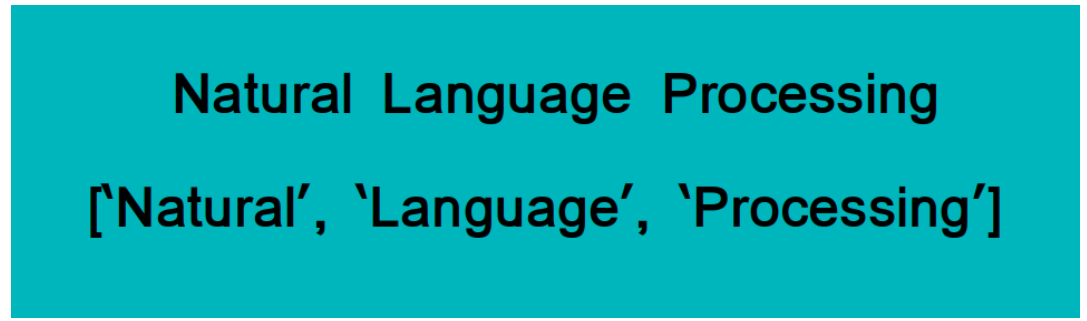

- The tokens could be words, numbers or punctuation marks. In tokenization, smaller units are created by locating word boundaries. 

**word boundaries?**

These are the ending point of a word and the beginning of the next word. These tokens are considered as a first step for stemming and lemmatization (the next stage in text preprocessing which we will cover in the next article).

In [24]:
import nltk 
text = "My dog got bored, and decided to chase our cat. So cat jumped into my arms"

In [25]:
sent_txt = nltk.sent_tokenize(text)
print(sent_txt)

['My dog got bored, and decided to chase our cat.', 'So cat jumped into my arms']


In [26]:
word_txt = nltk.word_tokenize(text)
print(word_txt)

['My', 'dog', 'got', 'bored', ',', 'and', 'decided', 'to', 'chase', 'our', 'cat', '.', 'So', 'cat', 'jumped', 'into', 'my', 'arms']


### **Sentence tokenization is performed before word tokenization**

In [33]:
# Performing these two tokenization simultaneously 
for sentence in sent_txt:
  tokenized_text = nltk.word_tokenize(sentence)
  print(tokenized_text)

['My', 'dog', 'got', 'bored', ',', 'and', 'decided', 'to', 'chase', 'our', 'cat', '.']
['So', 'cat', 'jumped', 'into', 'my', 'arms']


## **NLTK twitter aware Tokenizer**

In [34]:
from nltk.tokenize import TweetTokenizer

In [35]:
text = "That party was sooooo fun! :D #superfun"
tknzr = TweetTokenizer()
tknzr.tokenize(text)

['That', 'party', 'was', 'sooooo', 'fun', '!', ':D', '#superfun']

## **TweetTokenizer() identified wrong spelling ``sooooo,  smileys and hashtags`` too.**

# **NER & Regular Expressions**
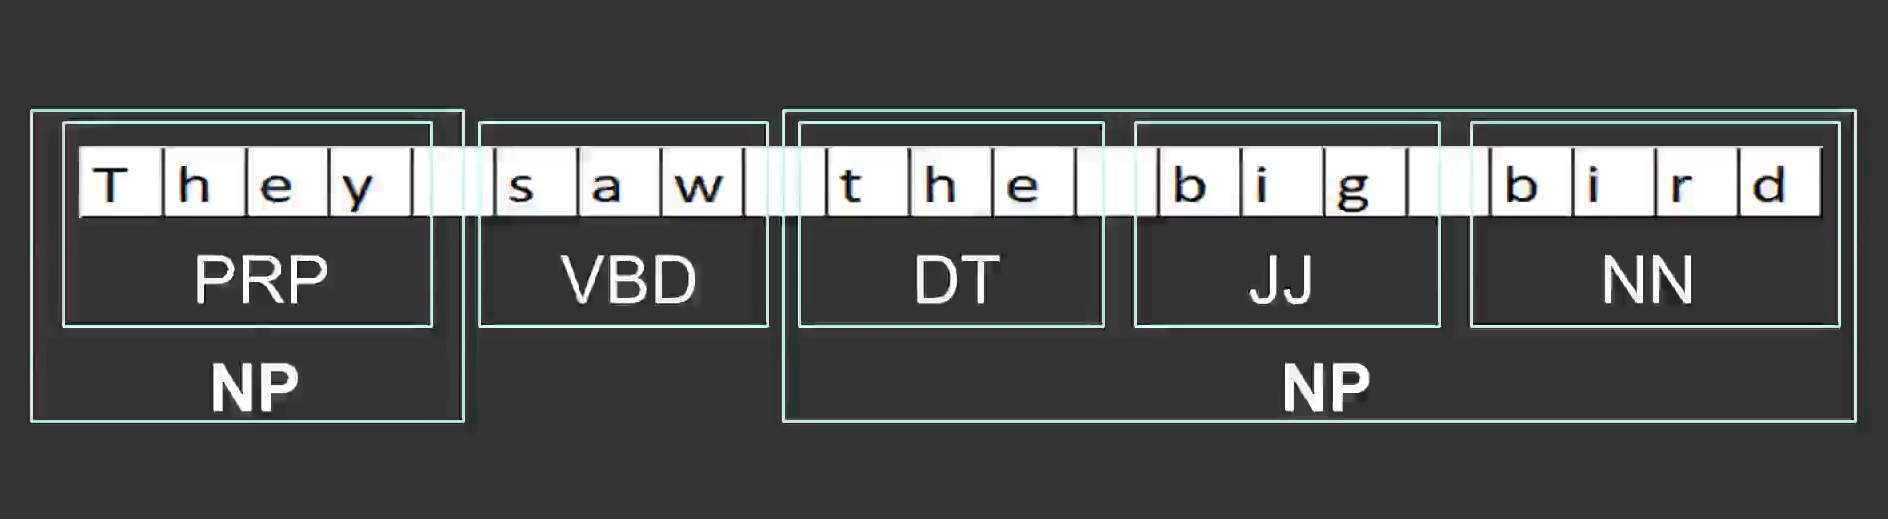

## **POS Tagging: PRP, VBD, DT, JJ (Individual parts of Speech)**
## **NER: NP (Group) (Noun Phrase)**

In [36]:
import nltk
from nltk.tag import pos_tag
ex = "The big yellow bird flow over my house"

In [37]:
# Performing Word tokenization and pos_tagging on the text.
def preprocess(sent):
  sent = nltk.word_tokenize(sent)
  sent = nltk.pos_tag(sent)
  return sent

In [38]:
sent = preprocess(ex)
sent

[('The', 'DT'),
 ('big', 'JJ'),
 ('yellow', 'JJ'),
 ('bird', 'NN'),
 ('flow', 'NN'),
 ('over', 'IN'),
 ('my', 'PRP$'),
 ('house', 'NN')]

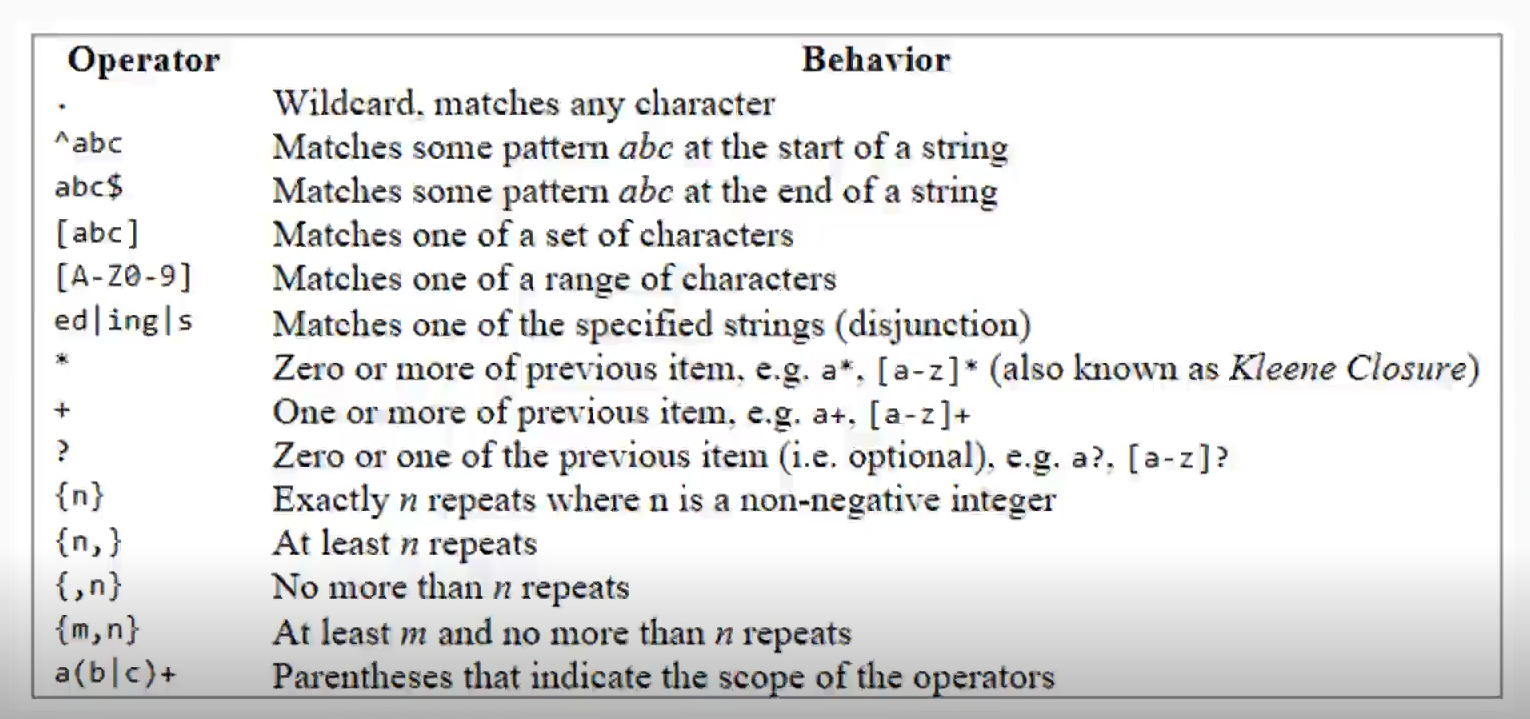

In [39]:
# Rule for Regular Expression
np_rule = "NP: {<DT>?<JJ>*<NN>}" # Rule which groups the DT- Determiner,JJ- Adjective,NN-Noun (Creates Noun Phrases)

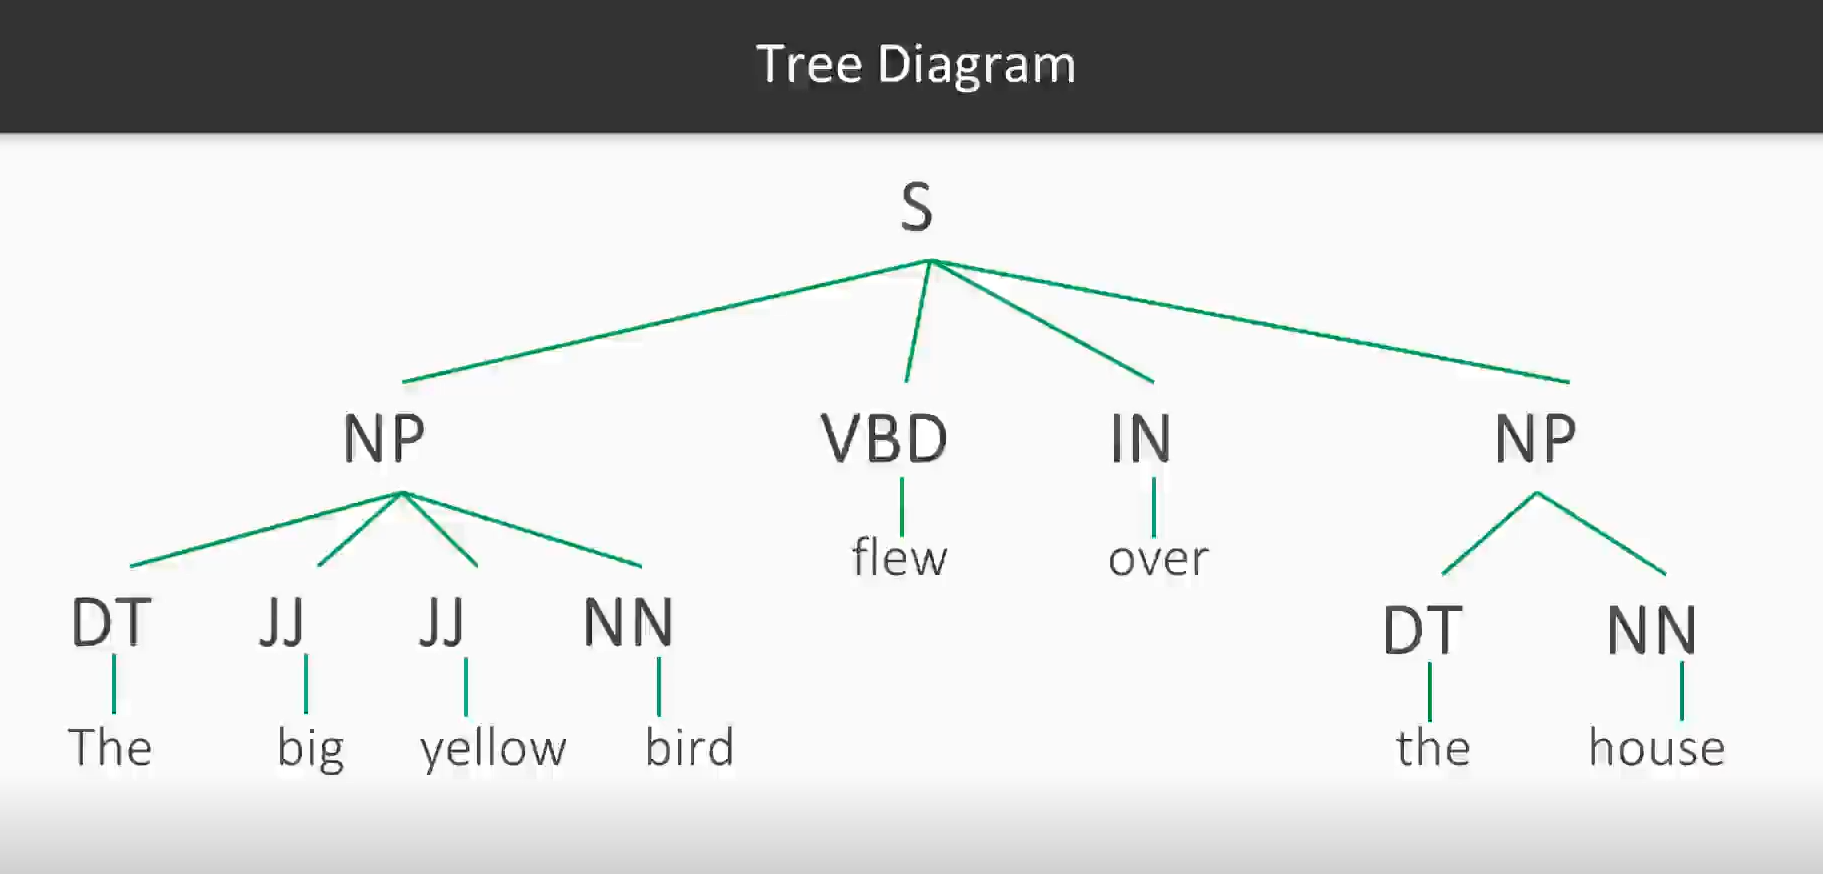

In [41]:
chunk_parser = nltk.chunk.regexp.RegexpParser(np_rule)
cs = chunk_parser.parse(sent)
print(cs)

(S
  (NP The/DT big/JJ yellow/JJ bird/NN)
  (NP flow/NN)
  over/IN
  my/PRP$
  (NP house/NN))


## **Creating own tokenizer**



In [46]:
import nltk
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
ex = "Her big yellow bird flow over my house"

In [47]:
sent = preprocess(ex)
sent

[('Her', 'PRP$'),
 ('big', 'JJ'),
 ('yellow', 'JJ'),
 ('bird', 'NN'),
 ('flow', 'NN'),
 ('over', 'IN'),
 ('my', 'PRP$'),
 ('house', 'NN')]

In [48]:
# Rule for Regular Expression
np_rule = "NP: {<DT|PRP\$>?<JJ>*<NN>}" # Rule which groups the PRP- Possesive pronoun, DT- Determiner,JJ- Adjective,NN-Noun (Creates Noun Phrases)

In [49]:
chunk_parser = nltk.chunk.regexp.RegexpParser(np_rule)
cs = chunk_parser.parse(sent)
print(cs)

(S
  (NP Her/PRP$ big/JJ yellow/JJ bird/NN)
  (NP flow/NN)
  over/IN
  (NP my/PRP$ house/NN))


**Possesive pronoun were found in ``Her Big yellow bird`` and ``my house``**